In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('Mall_Customers.csv')###SUPERVISED MACHINE LEARNING
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

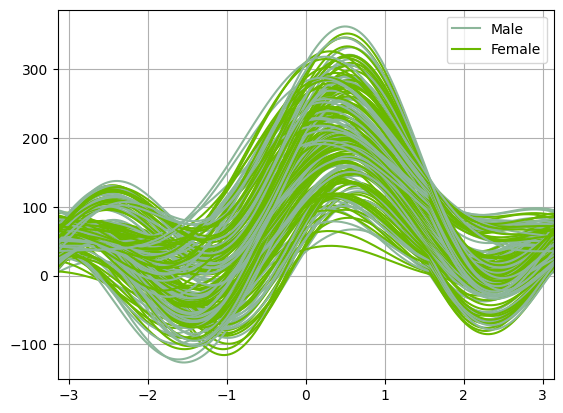

In [4]:
pd.plotting.andrews_curves(df,'Gender')

In [5]:
x = df.iloc[:,[3,4]].values #selection what is in the rows but applicable for column 3 and 4(ANNUAL INCOME & SPENDING SCORE)

In [6]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_) ### Here we want to know the suitable cluster to use but before we select it,we will visualize below
wcss

[269981.28,
 186206.76002258618,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 37265.86520484346,
 32278.293453087797,
 30082.81639696088,
 22842.54038868932,
 20598.126661892828]

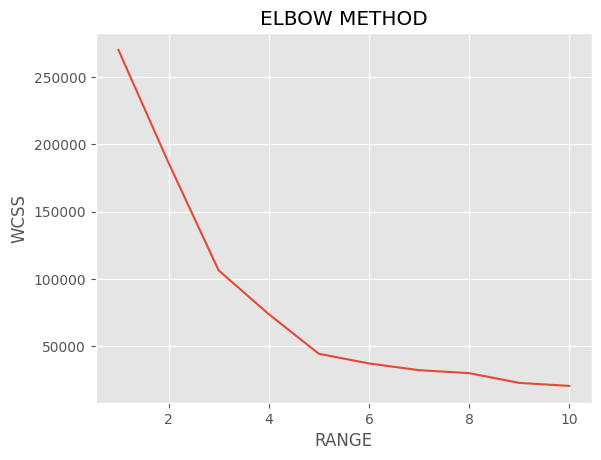

In [7]:
plt.style.use('ggplot')
plt.plot(range(1,11),wcss)
plt.xlabel('RANGE')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

In [8]:
km = KMeans(n_clusters=5)
ymean = km.fit_predict(x)
ymean

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

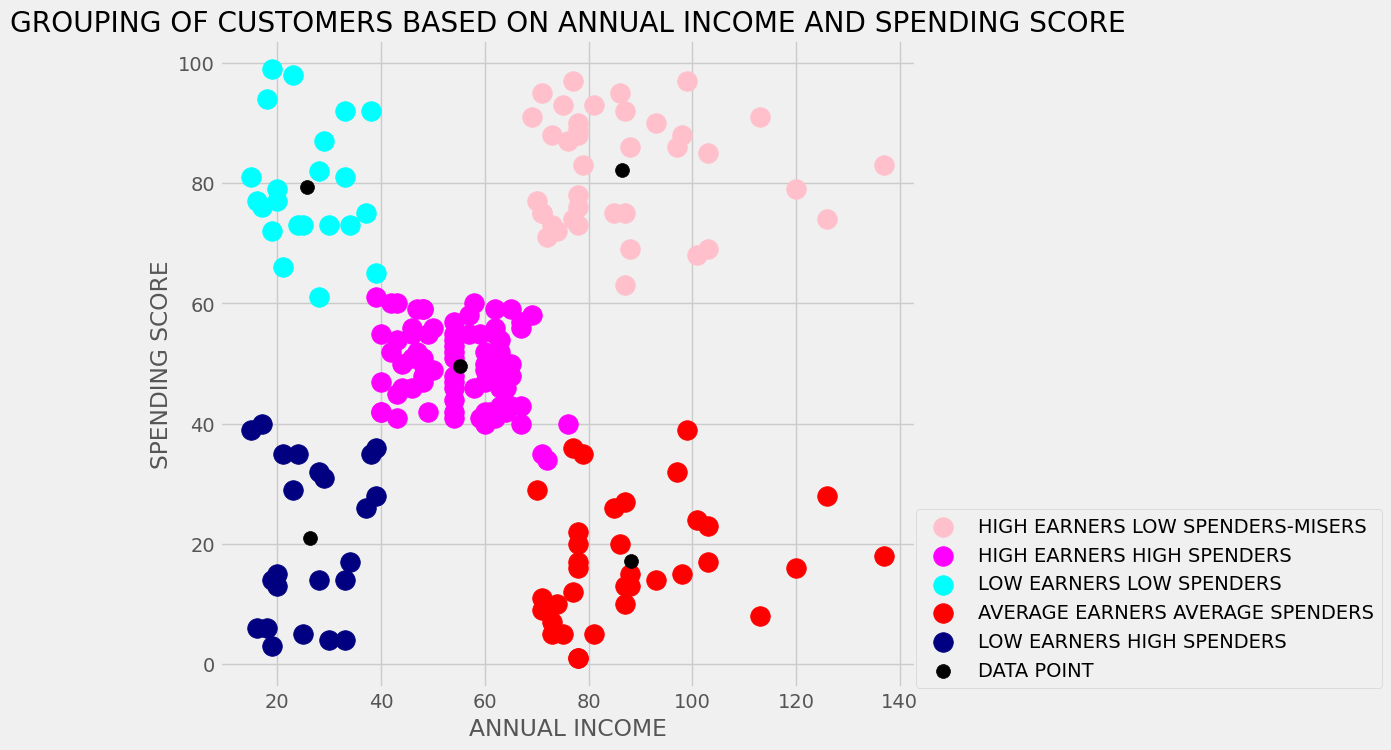

In [9]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
plt.scatter(x[ymean==0,0], x[ymean==0,1], c='pink', s = 200,label='HIGH EARNERS LOW SPENDERS-MISERS')
plt.scatter(x[ymean==1,0], x[ymean==1,1], c='magenta', s = 200,label='HIGH EARNERS HIGH SPENDERS')
plt.scatter(x[ymean==2,0], x[ymean==2,1], c='cyan', s = 200,label='LOW EARNERS LOW SPENDERS')
plt.scatter(x[ymean==3,0], x[ymean==3,1], c='red', s = 200,label='AVERAGE EARNERS AVERAGE SPENDERS')
plt.scatter(x[ymean==4,0], x[ymean==4,1], c='navy', s = 200,label='LOW EARNERS HIGH SPENDERS')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],c='black',s=100,label='DATA POINT')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('SPENDING SCORE')
plt.title('GROUPING OF CUSTOMERS BASED ON ANNUAL INCOME AND SPENDING SCORE')
plt.legend(loc=[1,0])
plt.show()

In [10]:
x1 = df.iloc[:,[2,3]].values## Checking for Age and Annual Income

In [41]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_) ### Here we want to know the suitable cluster to use but before we select it,we will visualize below
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 66532.58264851091,
 38831.146380835475,
 33859.371012691,
 32107.82849315642,
 23545.87178658953,
 19774.784179883114]

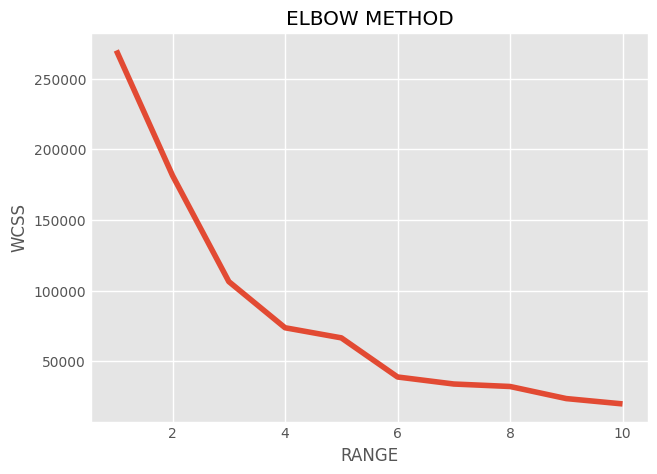

In [42]:
plt.style.use('ggplot')
plt.plot(range(1,11),wcss)
plt.xlabel('RANGE')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

In [43]:
km = KMeans(n_clusters=4)
ymean = km.fit_predict(x)
ymean

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

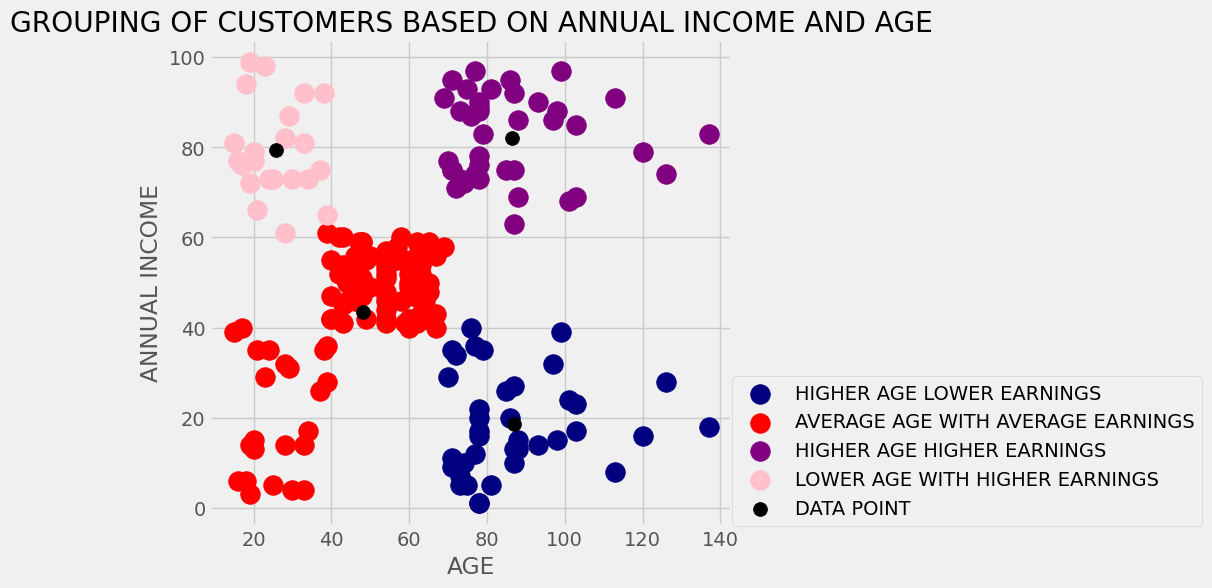

In [46]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,6))
plt.scatter(x[ymean==0,0], x[ymean==0,1], c='navy', s = 200,label='HIGHER AGE LOWER EARNINGS')
plt.scatter(x[ymean==1,0], x[ymean==1,1], c='red', s = 200,label='AVERAGE AGE WITH AVERAGE EARNINGS')
plt.scatter(x[ymean==2,0], x[ymean==2,1], c='purple', s = 200,label='HIGHER AGE HIGHER EARNINGS')
plt.scatter(x[ymean==3,0], x[ymean==3,1], c='pink', s = 200,label='LOWER AGE WITH HIGHER EARNINGS')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],c='black',s=100,label='DATA POINT')
plt.xlabel('AGE')
plt.ylabel('ANNUAL INCOME')
plt.title('GROUPING OF CUSTOMERS BASED ON ANNUAL INCOME AND AGE')
plt.legend(loc=[1,0])
plt.show()

In [47]:
m = df.iloc[:,[2,4]].values## Checking for Age and Spending Score

In [48]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(m)
    wcss.append(km.inertia_) ### Here we want to know the suitable cluster to use but before we select it,we will visualize below
wcss

[171535.50000000003,
 75949.15601023019,
 45840.67661610866,
 41181.11668704818,
 23849.72275616577,
 19644.255043202407,
 17805.186979619244,
 13098.210822385441,
 11514.093867845117,
 10174.627760345636]

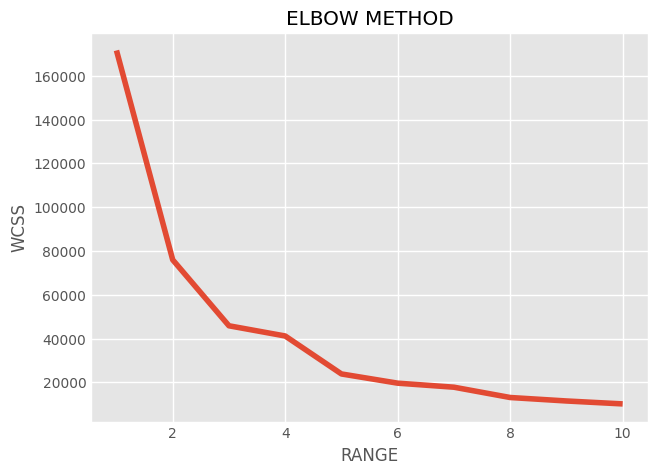

In [49]:
plt.style.use('ggplot')
plt.plot(range(1,11),wcss)
plt.xlabel('RANGE')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

In [50]:
km = KMeans(n_clusters=3)
ymean = km.fit_predict(m)
ymean

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

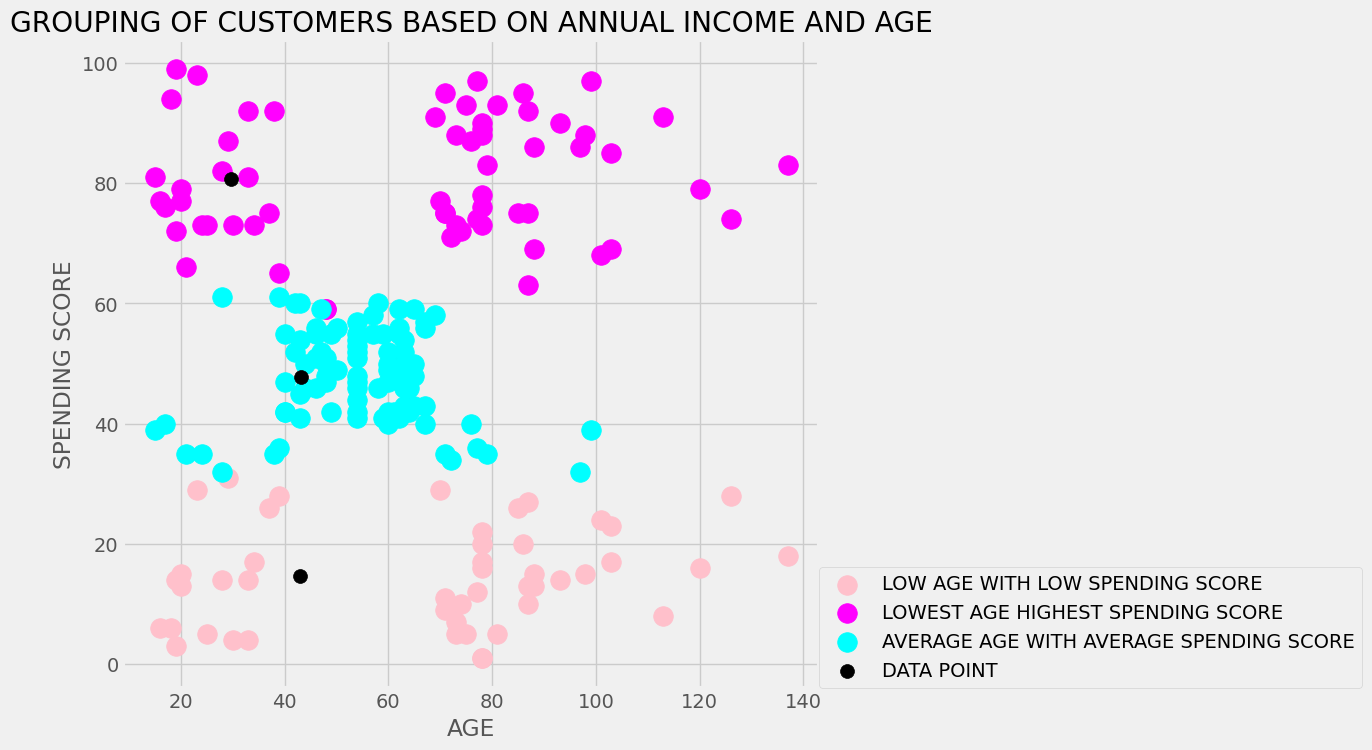

In [52]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
plt.scatter(x[ymean==0,0], x[ymean==0,1], c='pink', s = 200,label='LOW AGE WITH LOW SPENDING SCORE')
plt.scatter(x[ymean==1,0], x[ymean==1,1], c='magenta', s = 200,label='LOWEST AGE HIGHEST SPENDING SCORE')
plt.scatter(x[ymean==2,0], x[ymean==2,1], c='cyan', s = 200,label='AVERAGE AGE WITH AVERAGE SPENDING SCORE')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],c='black',s=100,label='DATA POINT')
plt.xlabel('AGE')
plt.ylabel('SPENDING SCORE')
plt.title('GROUPING OF CUSTOMERS BASED ON ANNUAL INCOME AND AGE')
plt.legend(loc=[1,0])
plt.show()